In [1]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/78321854/how-to-numerically-solve-a-second-order-derivative-equation-with-multiple-bounda

In [2]:
def model(x, y, p):
    return np.array([
        y[1],
        p[0] * y[0] + p[1] * y[0] ** 3
    ])

def jacobian(x, y, p):
    
    Jy = np.zeros((2, 2, x.size))
    Jy[0, 1, :] = 1.0
    Jy[1, 0, :] = p[0] + 3 * p[1] * y[0] ** 2
    
    Jp = np.zeros((2, 2, x.size))
    Jp[1, 0, :] = y[0]
    Jp[1, 1, :] = y[0] ** 3
    
    return Jy, Jp

def bc(ya, yb, p):
    return np.array([
        ya[0] + 1.,
        yb[0] - 1.,
        ya[1],
        yb[1],
    ])

In [3]:
x = np.linspace(-10., 10., 500)

In [4]:
y0 = np.zeros((2, x.size))
y0[0, :160] = -1.
y0[0, -160:] = +1.

In [5]:
y0 = np.zeros((2, x.size))
y0[0, :] = 2. * x / (x.max() - x.min())
y0[1, :] = 0.1

In [6]:
sol = integrate.solve_bvp(model, bc, x, y0, p=(-1., 1.), tol=1e-10, max_nodes=500000, verbose=2, fun_jac=jacobian)
sol

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.20e-01       2.64e-02          500            998      
       2          8.26e-01       1.42e-02         1498           2994      
       3          1.22e-05       0.00e+00         4492           8753      
       4          3.23e-06       8.17e-25         13245          23038     
       5          2.85e-06       7.72e-25         36283          64038     
       6          2.49e-12       0.00e+00        100321            0       
Solved in 6 iterations, number of nodes 100321. 
Maximum relative residual: 2.49e-12 
Maximum boundary residual: 0.00e+00


       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [-1.000e+01 -9.998e+00 ...  9.998e+00  1.000e+01]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7f7578cb8ea0>
             p: [-9.535e-01  9.535e-01]
             y: [[-1.000e+00 -1.000e+00 ...  1.000e+00  1.000e+00]
                 [ 0.000e+00  1.709e-08 ...  1.709e-08  0.000e+00]]
            yp: [[ 0.000e+00  1.709e-08 ...  1.709e-08  0.000e+00]
                 [ 7.673e-06  7.673e-06 ... -7.673e-06 -7.673e-06]]
 rms_residuals: [ 1.916e-14  3.110e-14 ...  3.110e-14  1.916e-14]
         niter: 6

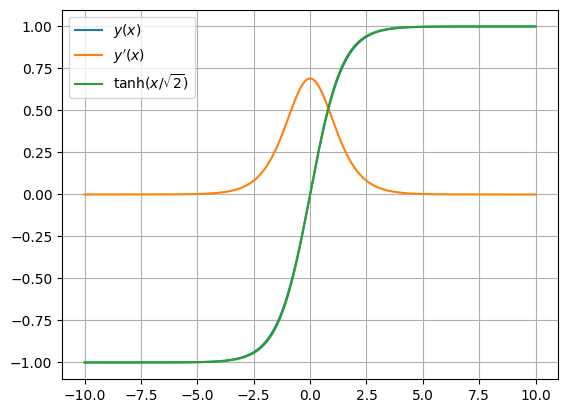

In [12]:
fig, axe = plt.subplots()
axe.plot(sol.x, sol.y.T)
axe.plot(sol.x, np.tanh(sol.x/np.sqrt(2.)))
axe.legend(["$y(x)$", "$y'(x)$", r"$\tanh(x/\sqrt{2})$"])
axe.grid()

In [8]:
def fit(x, a):
    return np.tanh(a * x)

In [9]:
1/np.sqrt(2)

0.7071067811865475

In [10]:
popt, pcov = optimize.curve_fit(fit, sol.x, sol.y[0])
popt, pcov

(array([0.6904899]), array([[1.2212364e-15]]))

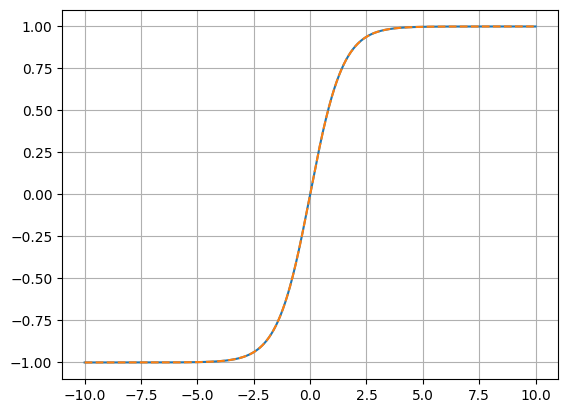

In [11]:
fig, axe = plt.subplots()
axe.plot(sol.x, sol.y[0])
axe.plot(sol.x, fit(sol.x, *popt), "--")
axe.grid()